In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# truth informations on tracks in which we are interested
Oct-11, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/truth_tracks_information/'

# pairs of tracks at close proximity

In [44]:
tracks_MCbnbDATAcosmic = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/tracks/prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_tracks.csv')
print len(tracks_MCbnbDATAcosmic),'tracks'

156335 tracks


# $PID_a$ of $\mu,p,\pi,K$?

In [36]:
sam = tracks_MCbnbDATAcosmic
pions = sam[(sam['pdg']==211) | (sam['pdg']==-211) | (sam['pdg']==111)]
print 'len(pions):',len(pions)
protons = sam[sam['pdg']==2212]
print 'len(protons):',len(protons)
muons = sam[(sam['pdg']==13) | (sam['pdg']==-13)]
print 'len(muons):',len(muons)
Kaons = sam[(sam['pdg']==130) | (sam['pdg']==310) | (sam['pdg']==311) | (sam['pdg']==321)]
print 'len(Kaons):',len(Kaons)
cosmic = sam[sam['pdg']==-9999]
print 'len(cosmic):',len(cosmic)
deuterons = sam[sam['pdg']==1000010020]
print 'len(deuterons):',len(deuterons)

len(pions): 1471
len(protons): 5991
len(muons): 13071
len(Kaons): 4
len(cosmic): 127830
len(deuterons): 16


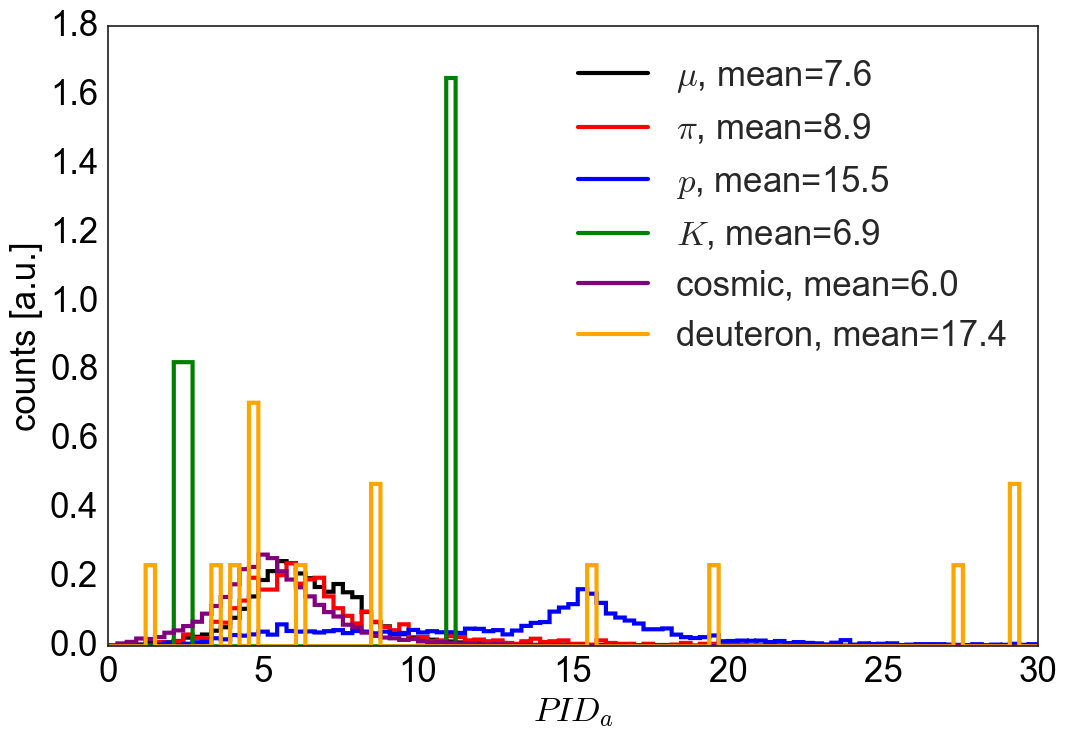

In [37]:
# plt.hist(muons_long['PIDa_long'],bins=np.linspace(0,30,100));
# plt.hist(muons_short['PIDa_short'],bins=np.linspace(0,30,100));
fig,ax=plt.subplots(figsize=(12,8))
for particle,name,color in zip([muons,pions,protons,Kaons,cosmic,deuterons]
                               ,[r'$\mu$',r'$\pi$',r'$p$',r'$K$',r'cosmic',r'deuteron']
                               ,['black','red','blue','green','purple','orange']):
    PIDa = particle[particle['PIDa']<100]['PIDa']
    plt.hist(PIDa,bins=np.linspace(0,30,100),normed=1,histtype='step',linewidth=3,color=color)
    mean = np.mean(PIDa)
    std = np.std(PIDa)
    plt.plot([0,0],[0,0],label=name+', mean=%.1f'%(mean),linewidth=3,color=color)

set_axes(ax,r'$PID_a$','counts [a.u.]',do_add_legend=True)
plt.savefig('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/PIDa/PIDaOfTruthParticles.pdf')

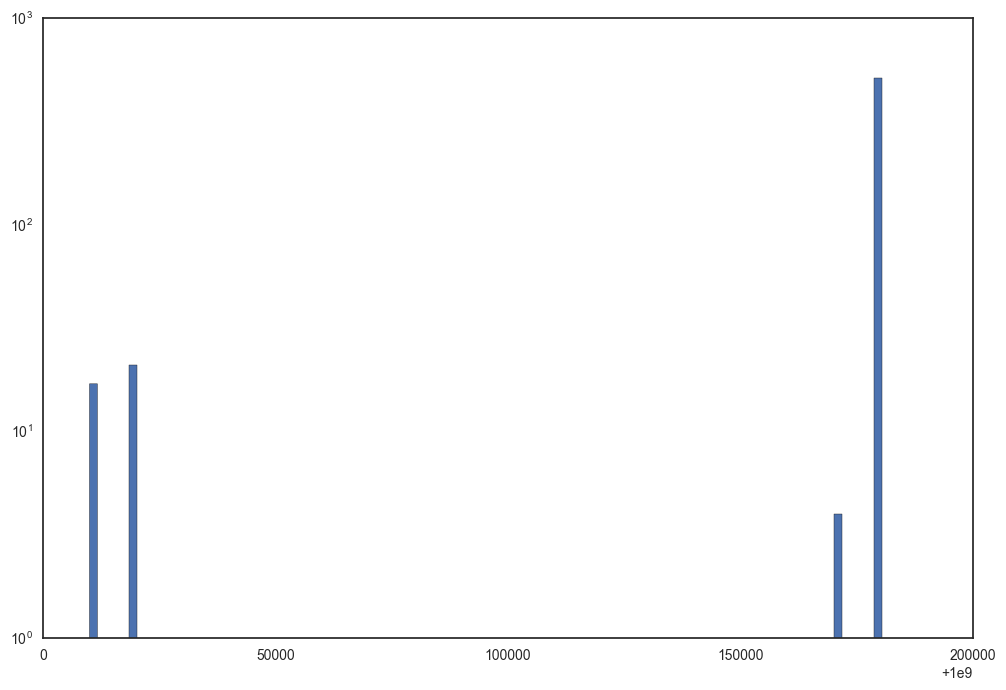

In [43]:
fig,ax=plt.subplots(figsize=(12,8))
pdg = tracks_MCbnbDATAcosmic[tracks_MCbnbDATAcosmic['pdg']>10000]['pdg']
plt.hist(pdg,bins=100);
ax.set_yscale('log')